In [1]:
# Make external packages available
from numpy import *
import matplotlib
%pylab inline
import sys
import os
from astropy.io import ascii
from astropy.io import fits
from astropy import wcs
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from PIL import Image
import aplpy
from astropy.coordinates import SkyCoord, FK4, FK5, Galactic

Populating the interactive namespace from numpy and matplotlib


[The above sets up python libraries that make the routines that we use work. Python comes with a (very) limited set of built-in features, and then uses libraries to allow it to do all sorts of truly impressive things - reading in data, plotting, statistics, etc.]

Read in the GHOSTS data.

In [2]:
gh_data_01 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field01.newphoto_radec')
gh_data_02 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field02.newphoto_radec')
gh_data_03 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field03.newphoto_radec')
gh_data_04 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field04.newphoto_radec')
gh_data_05 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field05.newphoto_radec')
gh_data_06 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field06.newphoto_radec')
gh_data_07 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field07.newphoto_radec')
gh_data_08 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field08.newphoto_radec')
gh_data_09 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field09.newphoto_radec')
gh_data_10 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field10.newphoto_radec')
gh_data_11 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field11.newphoto_radec')
gh_data_12 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field12.newphoto_radec')
gh_data_13 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field13.newphoto_radec')
gh_data_14 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field14.newphoto_radec')
gh_data_15 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field15.newphoto_radec')
gh_data_16 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field16.newphoto_radec')
gh_data_17 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field17.newphoto_radec')
gh_data_18 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field18.newphoto_radec')
gh_data_19 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field19.newphoto_radec')
gh_data_20 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field20.newphoto_radec')
gh_data_21 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field21.newphoto_radec')
gh_data_22 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field22.newphoto_radec')
gh_data_23 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field23.newphoto_radec')
gh_data_24 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field24.newphoto_radec')
gh_data_25 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field25.newphoto_radec')
gh_data_26 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field26.newphoto_radec')
gh_data_27 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field27.newphoto_radec')
gh_data_28 = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field28.newphoto_radec')

Now we have read in the dataset. Now we take the columns, and put them in handy arrays that are named reasonably. The columns are always the same, so you don't have to futz with the next 4 lines. Columns 1 and 2 are x and y on the detector (i.e., it's position in the picture that HST's digital camera took); you don't really need that right now so we don't bother to give it its own variables.

In [4]:
HI_dat = fits.open('http://www.astro.umass.edu/~myun/M81HIM0.FITS')

In [5]:
HI_dat.info()

Filename: C:\Users\Parker\.astropy\cache\download\2529f5a4010d9c9c7c4a11324b1047df
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     367   (579, 687, 1)   float32   


In [6]:
HI_map = HI_dat[0]

In [7]:
HI_map.data.shape

(1L, 687L, 579L)

In [8]:
HI_map.header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 /                                                
NAXIS   =                    3 /                                                
NAXIS1  =                  579 /                                                
NAXIS2  =                  687 /                                                
NAXIS3  =                    1 /                                                
EXTEND  =                    T /Tables following main image                     
BLOCKED =                    T /Tape may be blocked                             
OBJECT  = 'M81T    '           /SOURCE  NAME                                    
TELESCOP= 'VLA     '           /                                                
INSTRUME= 'VLA     '           /                                                
OBSERVER= 'AY48    '           /                                                
DATE-OBS= '1992-08-09'      

In [9]:
HI_map.header['TELESCOP']

'VLA'

In [10]:
HI_map.header.comments['TELESCOP']

''

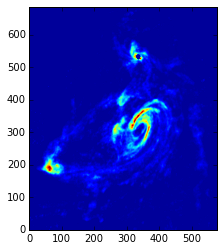

In [11]:
plt.imshow(HI_map.data[0,:,:], origin='lower')

In [12]:
HI_IMG = HI_map.data[0,:,:]

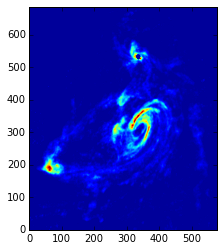

In [13]:
plt.imshow(HI_IMG, origin='lower')

In [14]:
print HI_IMG.shape

(687L, 579L)


In [15]:
pixra = list()
pixdec = list()
radecindex = 0
imax = len(HI_IMG[1,:])/1
jmax = len(HI_IMG[:,1])/1
for i in range(imax):
    for j in range(jmax):
        WCS_HI = WCS('M81HIM0.fits')
        null, lon, lat = WCS_HI.all_pix2world(0,i*1,j*1,0)
        pixra.append(lon)
        pixdec.append(lat)
        radecindex = radecindex+1
plot(pixra,pixdec,'k.')

KeyboardInterrupt: 

In [3]:
ra_01 = gh_data_01['col5'][:]
dec_01 = gh_data_01['col6'][:]
f606_01 = gh_data_01['col3'][:] # Magnitude in F606W filter (zeropoint - 2.5log10(flux@606nm))
f814_01 = gh_data_01['col4'][:] # Magnitude in F814W filter (zeropoint - 2.5log10(flux@814nm))

ra_02 = gh_data_02['col5'][:]
dec_02 = gh_data_02['col6'][:]
f606_02 = gh_data_02['col3'][:]
f814_02 = gh_data_02['col4'][:]

ra_03 = gh_data_03['col5'][:]
dec_03 = gh_data_03['col6'][:]
f606_03 = gh_data_03['col3'][:]
f814_03 = gh_data_03['col4'][:]

ra_04 = gh_data_04['col5'][:]
dec_04 = gh_data_04['col6'][:]
f606_04 = gh_data_04['col3'][:]
f814_04 = gh_data_04['col4'][:]

ra_05 = gh_data_05['col5'][:]
dec_05 = gh_data_05['col6'][:]
f606_05 = gh_data_05['col3'][:]
f814_05 = gh_data_05['col4'][:]

ra_06 = gh_data_06['col5'][:]
dec_06 = gh_data_06['col6'][:]
f606_06 = gh_data_06['col3'][:]
f814_06 = gh_data_06['col4'][:]

ra_07 = gh_data_07['col5'][:]
dec_07 = gh_data_07['col6'][:]
f606_07 = gh_data_07['col3'][:]
f814_07 = gh_data_07['col4'][:]

ra_08 = gh_data_08['col5'][:]
dec_08 = gh_data_08['col6'][:]
f606_08 = gh_data_08['col3'][:]
f814_08 = gh_data_08['col4'][:]

ra_09 = gh_data_09['col5'][:]
dec_09 = gh_data_09['col6'][:]
f606_09 = gh_data_09['col3'][:]
f814_09 = gh_data_09['col4'][:]

ra_10 = gh_data_10['col5'][:]
dec_10 = gh_data_10['col6'][:]
f606_10 = gh_data_10['col3'][:]
f814_10 = gh_data_10['col4'][:]

ra_11 = gh_data_11['col5'][:]
dec_11 = gh_data_11['col6'][:]
f606_11 = gh_data_11['col3'][:]
f814_11 = gh_data_11['col4'][:]

ra_12 = gh_data_12['col5'][:]
dec_12 = gh_data_12['col6'][:]
f606_12 = gh_data_12['col3'][:]
f814_12 = gh_data_12['col4'][:]

ra_13 = gh_data_13['col5'][:]
dec_13 = gh_data_13['col6'][:]
f606_13 = gh_data_13['col3'][:]
f814_13 = gh_data_13['col4'][:]

ra_14 = gh_data_14['col5'][:]
dec_14 = gh_data_14['col6'][:]
f606_14 = gh_data_14['col3'][:]
f814_14 = gh_data_14['col4'][:]

ra_15 = gh_data_15['col5'][:]
dec_15 = gh_data_15['col6'][:]
f606_15 = gh_data_15['col3'][:]
f814_15 = gh_data_15['col4'][:]

ra_16 = gh_data_16['col5'][:]
dec_16 = gh_data_16['col6'][:]
f606_16 = gh_data_16['col3'][:]
f814_16 = gh_data_16['col4'][:]

ra_17 = gh_data_17['col5'][:]
dec_17 = gh_data_17['col6'][:]
f606_17 = gh_data_17['col3'][:]
f814_17 = gh_data_17['col4'][:]

ra_18 = gh_data_18['col5'][:]
dec_18 = gh_data_18['col6'][:]
f606_18 = gh_data_18['col3'][:]
f814_18 = gh_data_18['col4'][:]

ra_19 = gh_data_19['col5'][:]
dec_19 = gh_data_19['col6'][:]
f606_19 = gh_data_19['col3'][:]
f814_19 = gh_data_19['col4'][:]

ra_20 = gh_data_20['col5'][:]
dec_20 = gh_data_20['col6'][:]
f606_20 = gh_data_20['col3'][:]
f814_20 = gh_data_20['col4'][:]

ra_21 = gh_data_21['col5'][:]
dec_21 = gh_data_21['col6'][:]
f606_21 = gh_data_21['col3'][:]
f814_21 = gh_data_21['col4'][:]

ra_22 = gh_data_22['col5'][:]
dec_22 = gh_data_22['col6'][:]
f606_22 = gh_data_22['col3'][:]
f814_22 = gh_data_22['col4'][:]

ra_23 = gh_data_23['col5'][:]
dec_23 = gh_data_23['col6'][:]
f606_23 = gh_data_23['col3'][:]
f814_23 = gh_data_23['col4'][:]

ra_24 = gh_data_24['col5'][:]
dec_24 = gh_data_24['col6'][:]
f606_24 = gh_data_24['col3'][:]
f814_24 = gh_data_24['col4'][:]

ra_25 = gh_data_25['col5'][:]
dec_25 = gh_data_25['col6'][:]
f606_25 = gh_data_25['col3'][:]
f814_25 = gh_data_25['col4'][:]

ra_26 = gh_data_26['col5'][:]
dec_26 = gh_data_26['col6'][:]
f606_26 = gh_data_26['col3'][:]
f814_26 = gh_data_26['col4'][:]

ra_27 = gh_data_27['col5'][:]
dec_27 = gh_data_27['col6'][:]
f606_27 = gh_data_27['col3'][:]
f814_27 = gh_data_27['col4'][:]

ra_28 = gh_data_28['col5'][:]
dec_28 = gh_data_28['col6'][:]
f606_28 = gh_data_28['col3'][:]
f814_28 = gh_data_28['col4'][:]

In [4]:
#ra_01
#ra_02
#np.hstack([ra_01, ra_02])
ra_all = np.hstack([ra_01, ra_02, ra_03, ra_04, ra_05, ra_06, ra_07, ra_08, ra_09, ra_10, ra_11, ra_12, ra_13, ra_14, ra_15, ra_16, ra_17, ra_18, ra_19, ra_20, ra_21, ra_22, ra_23, ra_24, ra_25, ra_26, ra_27, ra_28])
dec_all = np.hstack([dec_01, dec_02, dec_03, dec_04, dec_05, dec_06, dec_07, dec_08, dec_09, dec_10, dec_11, dec_12, dec_13, dec_14, dec_15, dec_16, dec_17, dec_18, dec_19, dec_20, dec_21, dec_22, dec_23, dec_24, dec_25, dec_26, dec_27, dec_28])
f606_all = np.hstack([f606_01, f606_02, f606_03, f606_04, f606_05, f606_06, f606_07, f606_08, f606_09, f606_10, f606_11, f606_12, f606_13, f606_14, f606_15, f606_16, f606_17, f606_18, f606_19, f606_20, f606_21, f606_22, f606_23, f606_24, f606_25, f606_26, f606_27, f606_28])
f814_all = np.hstack([f814_01, f814_02, f814_03, f814_04, f814_05, f814_06, f814_07, f814_08, f814_09, f814_10, f814_11, f814_12, f814_13, f814_14, f814_15, f814_16, f814_17, f814_18, f814_19, f814_20, f814_21, f814_22, f814_23, f814_24, f814_25, f814_26, f814_27, f814_28])
#f606_01
#f606_28
#f606_all

[Now we make a color-magnitude diagram. One plots F606W-F814W magnitude along the x-axis (a color) as a proxy for temperature (using Wein's law). The y-axis is F814W magnitude, as a proxy for luminosity, but because they're magnitudes they're backwards :) ]

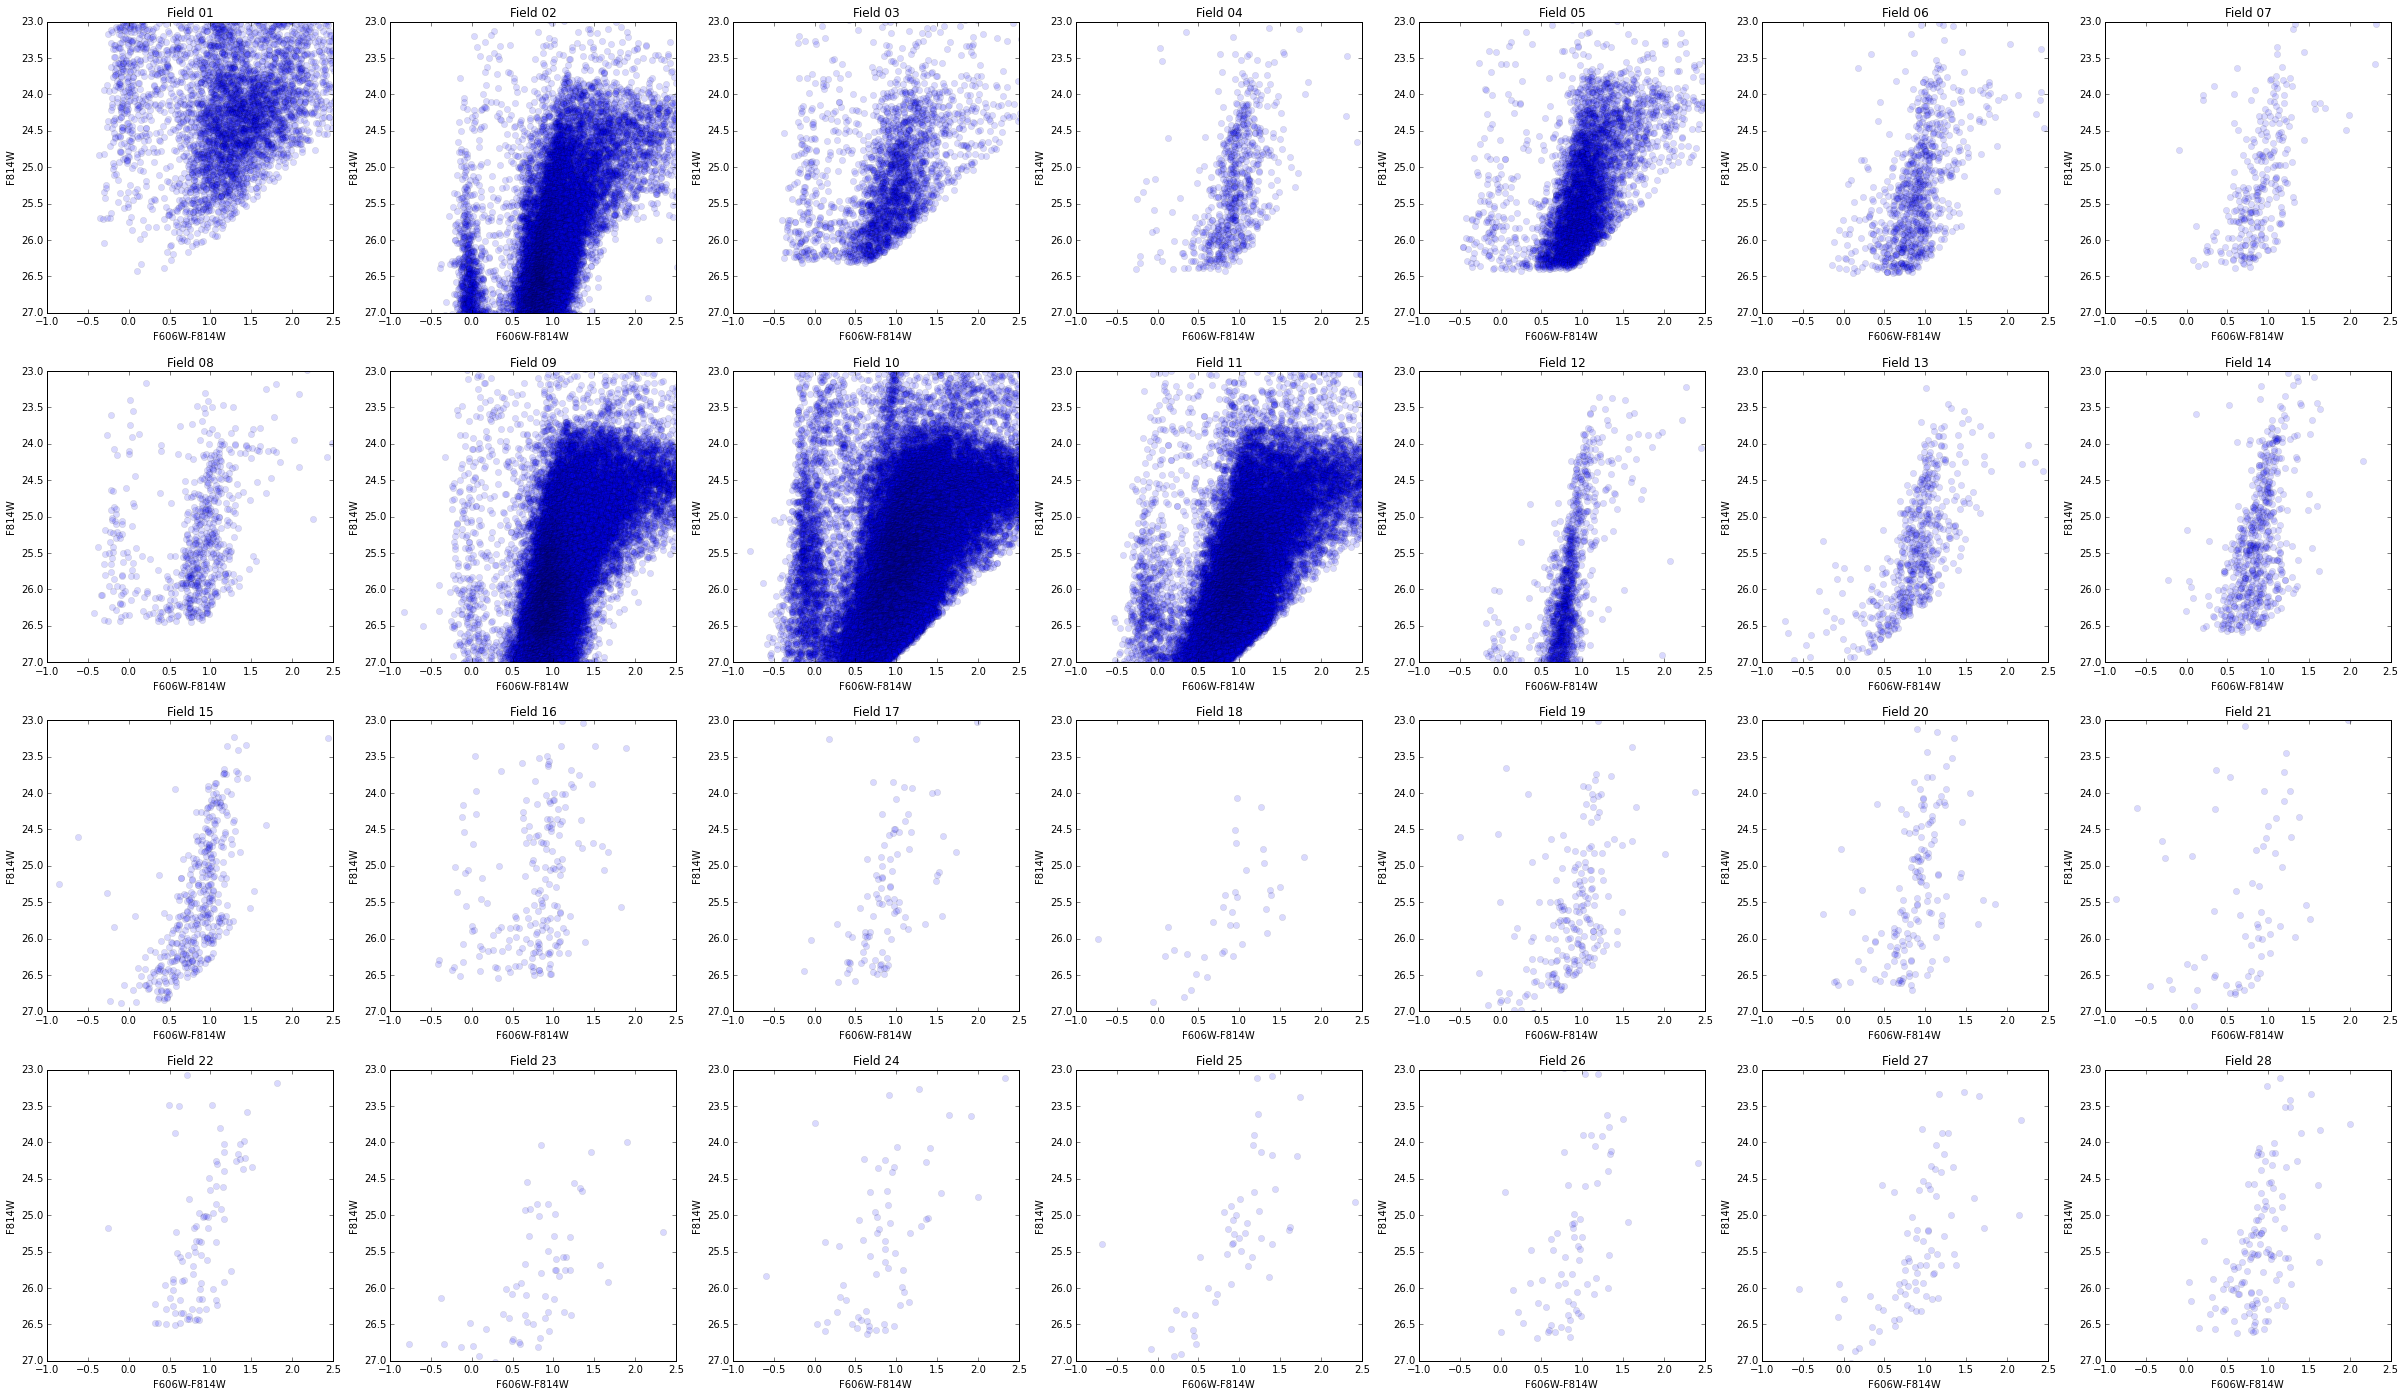

In [19]:
figure(figsize(42,24))

plt.subplot(4,7,1)
plot(f606_01-f814_01,f814_01, 'bo', alpha=0.15)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 01')

plt.subplot(4,7,2)
plot(f606_02-f814_02,f814_02, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 02')

plt.subplot(4,7,3)
plot(f606_03-f814_03,f814_03, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 03')

plt.subplot(4,7,4)
plot(f606_04-f814_04,f814_04, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 04')

plt.subplot(4,7,5)
plot(f606_05-f814_05,f814_05, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 05')

plt.subplot(4,7,6)
plot(f606_06-f814_06,f814_06, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 06')

plt.subplot(4,7,7)
plot(f606_07-f814_07,f814_07, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 07')

plt.subplot(4,7,8)
plot(f606_08-f814_08,f814_08, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 08')

plt.subplot(4,7,9)
plot(f606_09-f814_09,f814_09, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 09')

plt.subplot(4,7,10)
plot(f606_10-f814_10,f814_10, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 10')

plt.subplot(4,7,11)
plot(f606_11-f814_11,f814_11, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 11')

plt.subplot(4,7,12)
plot(f606_12-f814_12,f814_12, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 12')

plt.subplot(4,7,13)
plot(f606_13-f814_13,f814_13, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 13')

plt.subplot(4,7,14)
plot(f606_14-f814_14,f814_14, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 14')

plt.subplot(4,7,15)
plot(f606_15-f814_15,f814_15, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 15')

plt.subplot(4,7,16)
plot(f606_16-f814_16,f814_16, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 16')

plt.subplot(4,7,17)
plot(f606_17-f814_17,f814_17, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 17')

plt.subplot(4,7,18)
plot(f606_18-f814_18,f814_18, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 18')

plt.subplot(4,7,19)
plot(f606_19-f814_19,f814_19, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 19')

plt.subplot(4,7,20)
plot(f606_20-f814_20,f814_20, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 20')

plt.subplot(4,7,21)
plot(f606_21-f814_21,f814_21, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 21')

plt.subplot(4,7,22)
plot(f606_22-f814_22,f814_22, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 22')

plt.subplot(4,7,23)
plot(f606_23-f814_23,f814_23, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 23')

plt.subplot(4,7,24)
plot(f606_24-f814_24,f814_24, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 24')

plt.subplot(4,7,25)
plot(f606_25-f814_25,f814_25, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 25')

plt.subplot(4,7,26)
plot(f606_26-f814_26,f814_26, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 26')

plt.subplot(4,7,27)
plot(f606_27-f814_27,f814_27, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 27')

plt.subplot(4,7,28)
plot(f606_28-f814_28,f814_28, 'bo', alpha=0.15)
axis([-1,2.5,27,23])
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 28')


plt.show()

[Select bright stars (for the sake of argument), then plot all stars up, and overplot the bright ones up in ra/dec in blue (the equivalent of longitude and latitude on the sky) space. RA has the amusing convention of being plotted backwards (because you're on the inside of the celestial sphere looking out, sigh).]

EDIT: I have selected what stars I have deemed to be both "bright" and "blue" and plotted them as bright blue circles. Those stars which are "blue" but not "bright" are dimmer blue circles, and the stars that are not blue at all are plotted faintly in red.

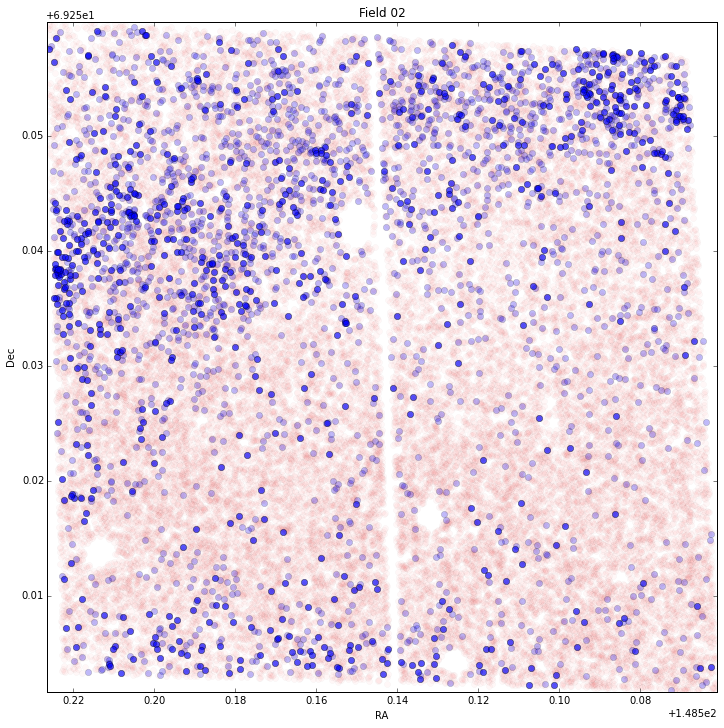

In [20]:
figure(figsize(12,12))
blue, = where (((-0.4) < (f606_02-f814_02)) & ((f606_02-f814_02) < (0.2)))
briblu, = where (((-0.4) < (f606_02-f814_02)) & ((f606_02-f814_02) < (0.2)) & ((23) < (f814_02)) & ((f814_02) < (27)))
plot(ra_02,dec_02,'ro',alpha=0.03)
plot(ra_02[blue],dec_02[blue],'bo',alpha=0.25)
plot(ra_02[briblu],dec_02[briblu],'bo',alpha=0.55)
axis([max(ra_02),min(ra_02),min(dec_02),max(dec_02)])
xlabel('RA')
ylabel('Dec')
plt.title('Field 02')


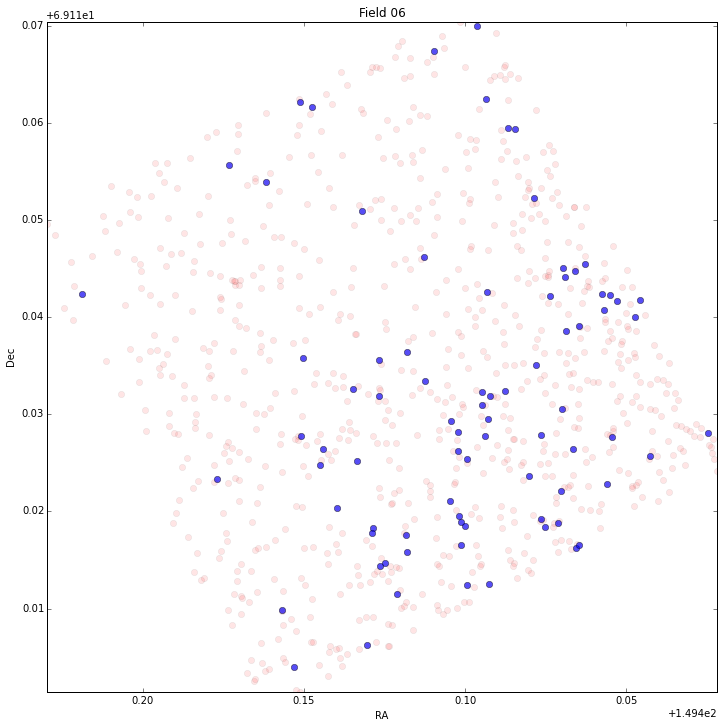

In [21]:
figure(figsize(12,12))
blue, = where (((-0.5) < (f606_06-f814_06)) & ((f606_06-f814_06) < (0.5)))
briblu, = where (((-0.5) < (f606_06-f814_06)) & ((f606_06-f814_06) < (0.5)) & ((22) < (f814_06)) & ((f814_06) < (27))) #where(((23) < (f814_all[blue])) & ((f814_all[blue]) < (27)))
plot(ra_06,dec_06,'ro',alpha=0.1)
plot(ra_06[blue],dec_06[blue],'bo',alpha=0.25)
plot(ra_06[briblu],dec_06[briblu],'bo',alpha=0.55)
axis([max(ra_06),min(ra_06),min(dec_06),max(dec_06)])
xlabel('RA')
ylabel('Dec')
plt.title('Field 06')

In [22]:
figure(figsize(12,12))
blue, = where (((-0.5) < (f606_01-f814_01)) & ((f606_01-f814_01) < (0.2)))
briblu, = where (((-0.5) < (f606_01-f814_01)) & ((f606_01-f814_01) < (0.2)) & ((21) < (f814_01)) & ((f814_01) < (26))) #where(((23) < (f814_all[blue])) & ((f814_all[blue]) < (27)))
plot(ra_01,dec_01,'ro',alpha=0.1)
plot(ra_01[blue],dec_01[blue],'bo',alpha=0.25)
plot(ra_01[briblu],dec_01[briblu],'bo',alpha=0.55)
axis([max(ra_01),min(ra_01),min(dec_01),max(dec_01)])
xlabel('RA')
ylabel('Dec')
plt.title('Field 01')

Now I have plotted all of the "bright blue" stars found in all 28 fields of the M81 GHOSTS data.

In [7]:
figure(figsize(12,12))
blue, = where (((-0.4) < (f606_all-f814_all)) & ((f606_all-f814_all) < (0.2)))
briblu, = where (((-0.4) < (f606_all-f814_all)) & ((f606_all-f814_all) < (0.2)) & ((23) < (f814_all)) & ((f814_all) < (27))) #where(((23) < (f814_all[blue])) & ((f814_all[blue]) < (27)))
plot(ra_all,dec_all, 'ro', alpha=.01)
plot(ra_all[blue],dec_all[blue],'yo',alpha=0.25)
plot(ra_all[briblu],dec_all[briblu],'bo',alpha=0.55)
axis([max(ra_all),min(ra_all),min(dec_all),max(dec_all)])
xlabel('RA')
ylabel('Dec')
plt.title('All Fields')

Here's some stuff for Niccolo.

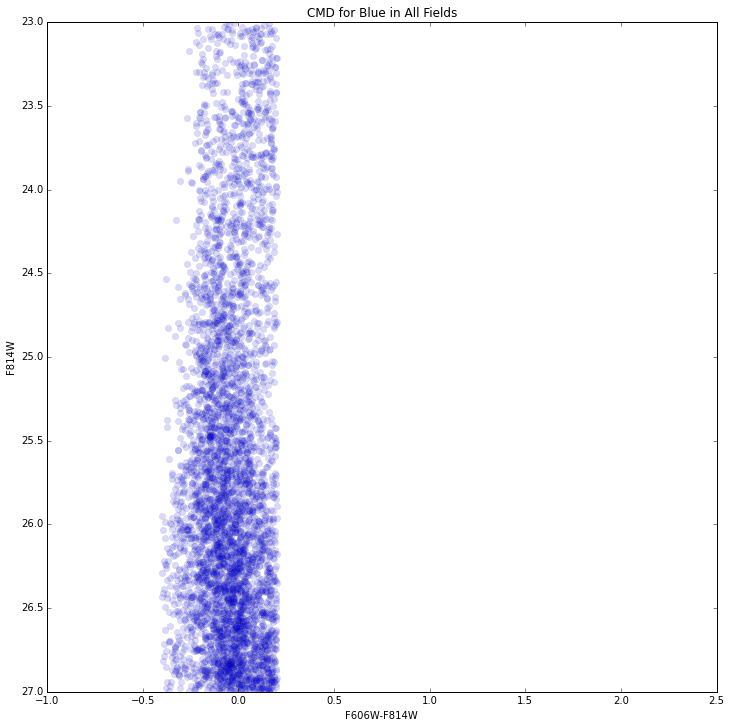

In [24]:
figure(figsize(12,12))
blue, = where (((-0.4) < (f606_all-f814_all)) & ((f606_all-f814_all) < (0.2)))
briblu, = where (((-0.4) < (f606_all-f814_all)) & ((f606_all-f814_all) < (0.2)) & ((23) < (f814_all)) & ((f814_all) < (27))) #where(((23) < (f814_all[blue])) & ((f814_all[blue]) < (27)))
plot((f606_all[briblu])-(f814_all[briblu]),f814_all[briblu], 'bo', alpha=0.15)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('CMD for Blue in All Fields')

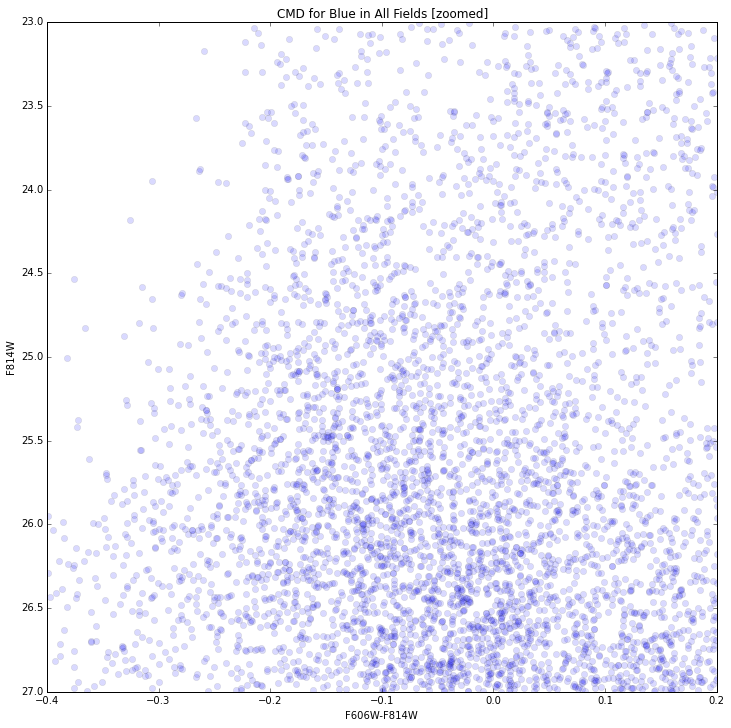

In [25]:
figure(figsize(12,12))
blue, = where (((-0.4) < (f606_all-f814_all)) & ((f606_all-f814_all) < (0.2)))
briblu, = where (((-0.4) < (f606_all-f814_all)) & ((f606_all-f814_all) < (0.2)) & ((23) < (f814_all)) & ((f814_all) < (27))) #where(((23) < (f814_all[blue])) & ((f814_all[blue]) < (27)))
plot((f606_all[briblu])-(f814_all[briblu]),f814_all[briblu], 'bo', alpha=0.15)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-.4,.2,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('CMD for Blue in All Fields [zoomed]')

Here, I have created a new set of fields called MiASs (the Minor Axis Subset) for deeper study of the mysterious "blue" stars that appear to be living way out there.

In [8]:
ra_miass = np.hstack([ra_21, ra_22, ra_23, ra_24, ra_25, ra_26])
dec_miass = np.hstack([dec_21, dec_22, dec_23, dec_24, dec_25, dec_26])
f606_miass = np.hstack([f606_21, f606_22, f606_23, f606_24, f606_25, f606_26])
f814_miass = np.hstack([f814_21, f814_22, f814_23, f814_24, f814_25, f814_26])

In [9]:
blue2, = where (((-0.4) < (f606_miass-f814_miass)) & ((f606_miass-f814_miass) < (0.2)))
briblu2, = where (((-0.4) < (f606_miass-f814_miass)) & ((f606_miass-f814_miass) < (0.2)) & ((23) < (f814_miass)) & ((f814_miass) < (27))) #where(((23) < (f814_miass[blue2])) & ((f814_miass[blue2]) < (27)))

print blue2
print briblu2

bluecon, = where (((-0.4) < (f606_06-f814_06)) & ((f606_06-f814_06) < (0.2)))
briblucon, = where (((-0.4) < (f606_06-f814_06)) & ((f606_06-f814_06) < (0.2)) & ((23) < (f814_06)) & ((f814_06) < (27))) #where(((23) < (f814_06[bluecon])) & ((f814_06[bluecon) < (27)))

print bluecon
print briblucon

print np.size(f606_06-f814_06)
print np.size(f814_06)

[ 12  19  23  43  47  50  53  57  64 103 201 207 215 220 232 234 239 252
 260 282 310 312 313 387 391 393 420 443 456]
[ 12  19  23  43  47  50  53  57  64 103 201 207 215 220 232 234 239 260
 282 310 312 313 387 391 393 420 443 456]
[ 15 170 179 261 303 347 367 376 405 419 428 431 460 509 530 531 535 552
 574 578 611 616 622 695 711]
[ 15 170 179 261 303 347 367 376 405 419 428 431 460 509 530 531 535 552
 574 578 611 616 622 695 711]
868
868


Here I am comparing the CMDs of the bright blue stars in MiASs and the blue stars in a control field--I chose Field 6.

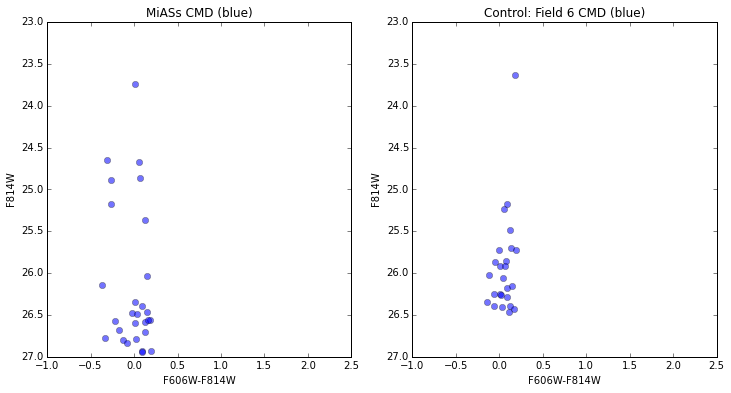

In [28]:
figure(figsize(12,6))

plt.subplot(1,2,1)
plot((f606_miass-f814_miass)[briblu2],f814_miass[briblu2], 'bo', alpha=0.55)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('MiASs CMD (blue)')

plt.subplot(1,2,2)
plot((f606_06-f814_06)[briblucon],f814_06[briblucon], 'bo', alpha=0.55)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Control: Field 6 CMD (blue)')

plt.show()

And here I am comparing the CMDs (for all stars--not just the bright blue ones) of each of the MiASs fields against that of Field 6.

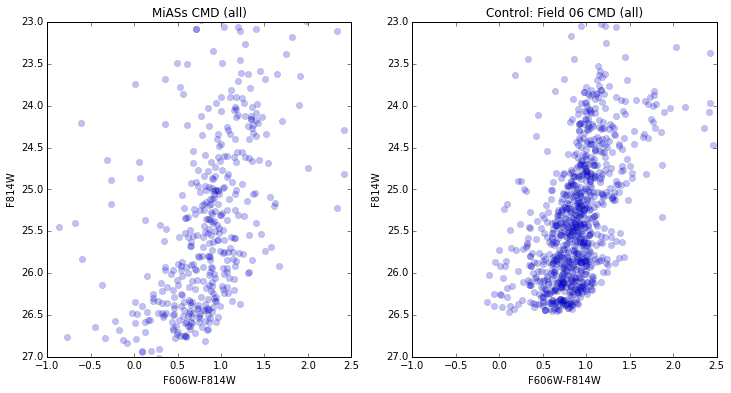

In [29]:
figure(figsize(12,6))

plt.subplot(1,2,1)
plot(f606_miass-f814_miass,f814_miass, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('MiASs CMD (all)')

plt.subplot(1,2,2)
plot(f606_06-f814_06,f814_06, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Control: Field 06 CMD (all)')

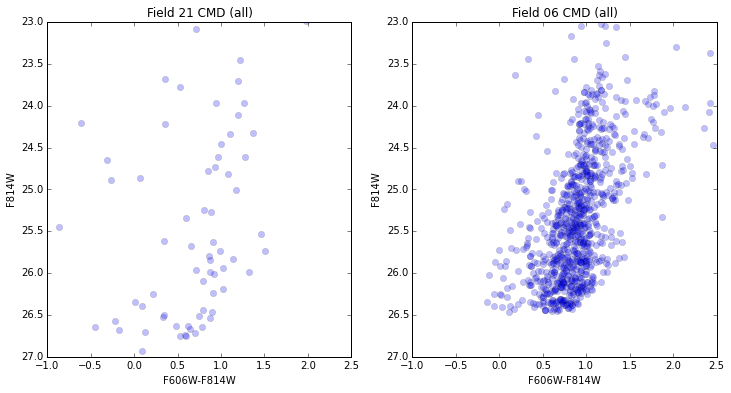

In [30]:
figure(figsize(12,6))

plt.subplot(1,2,1)
plot(f606_21-f814_21,f814_21, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 21 CMD (all)')

plt.subplot(1,2,2)
plot(f606_06-f814_06,f814_06, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 06 CMD (all)')

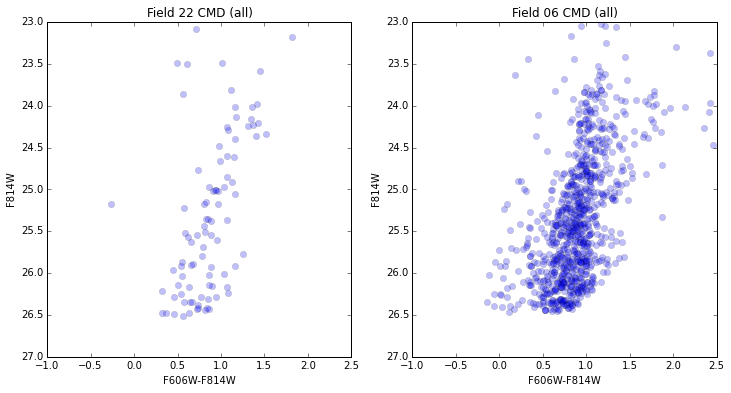

In [31]:
figure(figsize(12,6))

plt.subplot(1,2,1)
plot(f606_22-f814_22,f814_22, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 22 CMD (all)')

plt.subplot(1,2,2)
plot(f606_06-f814_06,f814_06, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 06 CMD (all)')

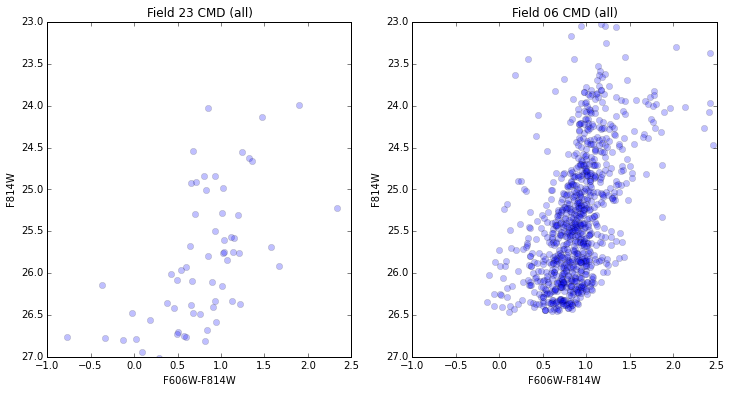

In [32]:
figure(figsize(12,6))

plt.subplot(1,2,1)
plot(f606_23-f814_23,f814_23, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 23 CMD (all)')

plt.subplot(1,2,2)
plot(f606_06-f814_06,f814_06, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 06 CMD (all)')

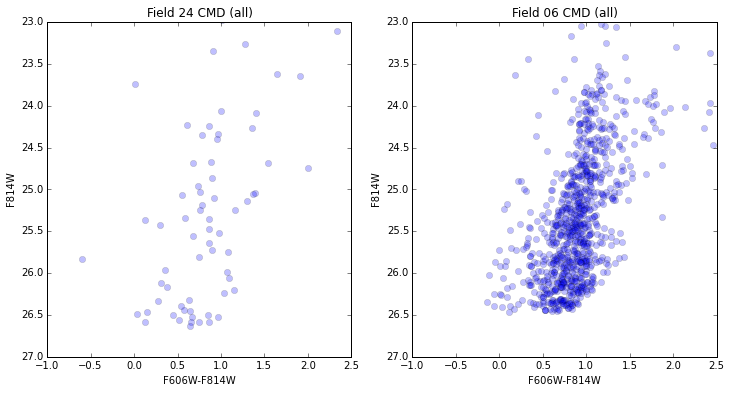

In [33]:
figure(figsize(12,6))

plt.subplot(1,2,1)
plot(f606_24-f814_24,f814_24, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 24 CMD (all)')

plt.subplot(1,2,2)
plot(f606_06-f814_06,f814_06, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 06 CMD (all)')

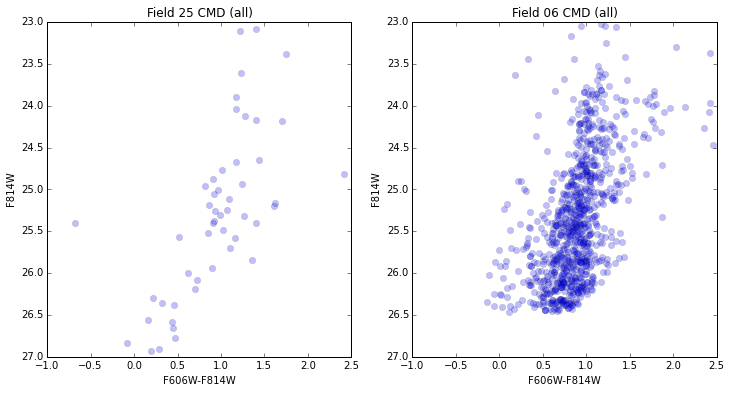

In [34]:
figure(figsize(12,6))

plt.subplot(1,2,1)
plot(f606_25-f814_25,f814_25, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 25 CMD (all)')

plt.subplot(1,2,2)
plot(f606_06-f814_06,f814_06, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 06 CMD (all)')

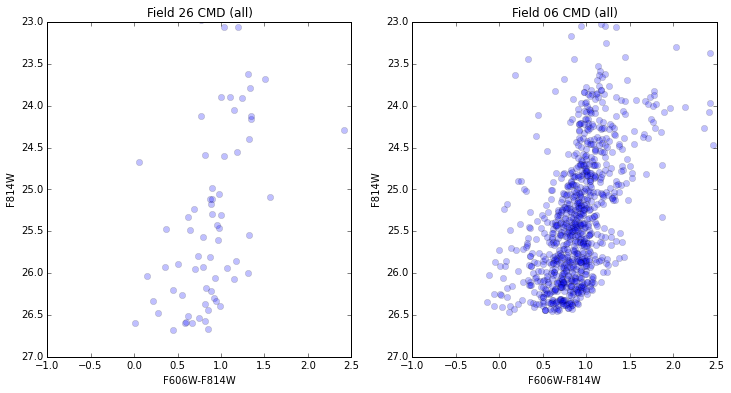

In [35]:
figure(figsize(12,6))

plt.subplot(1,2,1)
plot(f606_26-f814_26,f814_26, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 26 CMD (all)')

plt.subplot(1,2,2)
plot(f606_06-f814_06,f814_06, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 06 CMD (all)')

This is just a reprint of all of the fields again, for the sake of convenience.

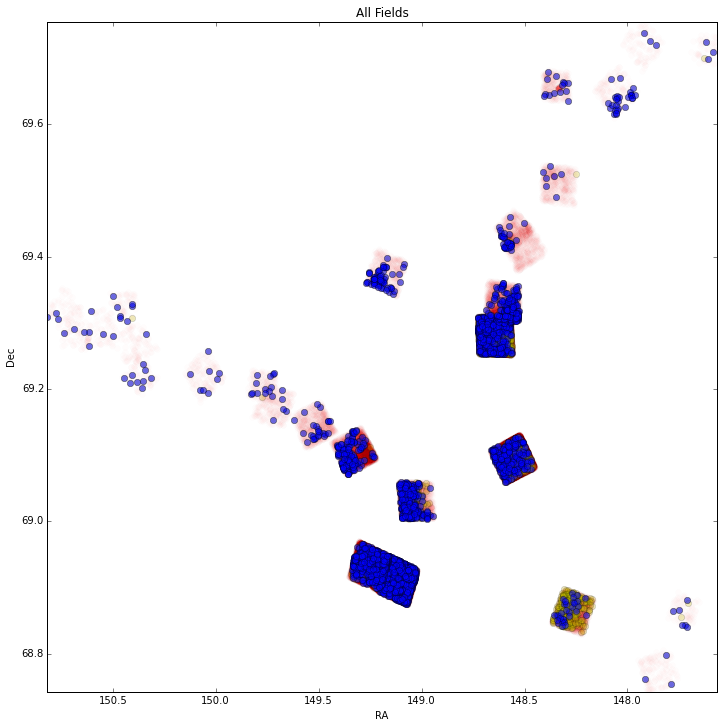

In [10]:
figure(figsize(12,12))
blue, = where (((-0.4) < (f606_all-f814_all)) & ((f606_all-f814_all) < (0.2)))
briblu, = where (((-0.4) < (f606_all-f814_all)) & ((f606_all-f814_all) < (0.2)) & ((23) < (f814_all)) & ((f814_all) < (27))) #where(((23) < (f814_all[blue])) & ((f814_all[blue]) < (27)))
plot(ra_all,dec_all, 'ro', alpha=.01)
plot(ra_all[blue],dec_all[blue],'yo',alpha=0.25)
plot(ra_all[briblu],dec_all[briblu],'bo',alpha=0.55)
axis([max(ra_all),min(ra_all),min(dec_all),max(dec_all)])
xlabel('RA')
ylabel('Dec')
plt.title('All Fields')

At this point, I began exploring some of the outer major axis fields, as they were returning "blue" stars that seemed a little out of line.

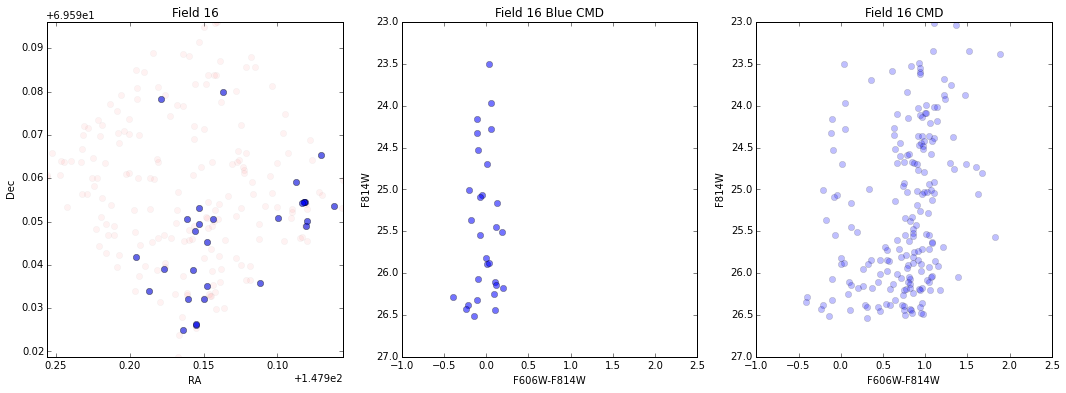

In [11]:
figure(figsize(18,6))

plt.subplot(1,3,1)
blue, = where (((-0.4) < (f606_16-f814_16)) & ((f606_16-f814_16) < (0.2)))
briblu, = where (((-0.4) < (f606_16-f814_16)) & ((f606_16-f814_16) < (0.2)) & ((23) < (f814_16)) & ((f814_16) < (27))) #where(((23) < (f814_all[blue])) & ((f814_all[blue]) < (27)))
plot(ra_16,dec_16, 'ro', alpha=.05)
plot(ra_16[blue],dec_16[blue],'go',alpha=0.15)
plot(ra_16[briblu],dec_16[briblu],'bo',alpha=0.55)
axis([max(ra_16),min(ra_16),min(dec_16),max(dec_16)])
xlabel('RA')
ylabel('Dec')
plt.title('Field 16')


plt.subplot(1,3,2)
plot((f606_16-f814_16)[briblu],f814_16[briblu], 'bo', alpha=0.55)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 16 Blue CMD')


plt.subplot(1,3,3)
plot(f606_16-f814_16,f814_16, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 16 CMD')

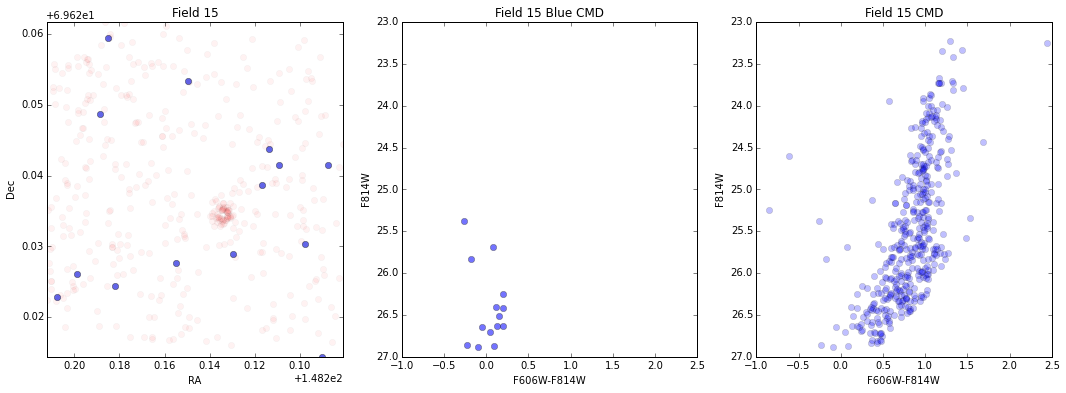

In [12]:
figure(figsize(18,6))

plt.subplot(1,3,1)
blue, = where (((-0.4) < (f606_15-f814_15)) & ((f606_15-f814_15) < (0.2)))
briblu, = where (((-0.4) < (f606_15-f814_15)) & ((f606_15-f814_15) < (0.2)) & ((23) < (f814_15)) & ((f814_15) < (27))) #where(((23) < (f814_all[blue])) & ((f814_all[blue]) < (27)))
plot(ra_15,dec_15, 'ro', alpha=.05)
plot(ra_15[blue],dec_15[blue],'go',alpha=0.15)
plot(ra_15[briblu],dec_15[briblu],'bo',alpha=0.55)
axis([max(ra_15),min(ra_15),min(dec_15),max(dec_15)])
xlabel('RA')
ylabel('Dec')
plt.title('Field 15')


plt.subplot(1,3,2)
plot((f606_15-f814_15)[briblu],f814_15[briblu], 'bo', alpha=0.55)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 15 Blue CMD')


plt.subplot(1,3,3)
plot(f606_15-f814_15,f814_15, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 15 CMD')

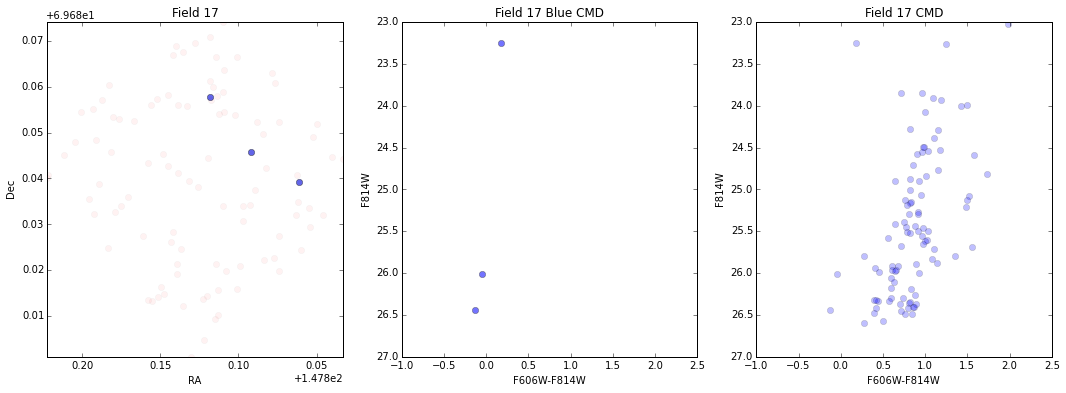

In [13]:
figure(figsize(18,6))

plt.subplot(1,3,1)
blue, = where (((-0.4) < (f606_17-f814_17)) & ((f606_17-f814_17) < (0.2)))
briblu, = where (((-0.4) < (f606_17-f814_17)) & ((f606_17-f814_17) < (0.2)) & ((23) < (f814_17)) & ((f814_17) < (27))) #where(((23) < (f814_all[blue])) & ((f814_all[blue]) < (27)))
plot(ra_17,dec_17, 'ro', alpha=.05)
plot(ra_17[blue],dec_17[blue],'go',alpha=0.15)
plot(ra_17[briblu],dec_17[briblu],'bo',alpha=0.55)
axis([max(ra_17),min(ra_17),min(dec_17),max(dec_17)])
xlabel('RA')
ylabel('Dec')
plt.title('Field 17')


plt.subplot(1,3,2)
plot((f606_17-f814_17)[briblu],f814_17[briblu], 'bo', alpha=0.55)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 17 Blue CMD')


plt.subplot(1,3,3)
plot(f606_17-f814_17,f814_17, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 17 CMD')

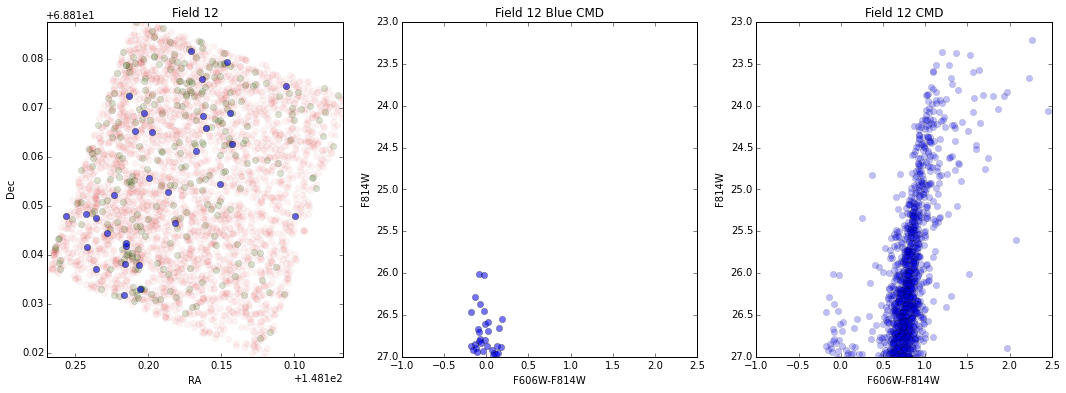

In [14]:
figure(figsize(18,6))

plt.subplot(1,3,1)
blue, = where (((-0.4) < (f606_12-f814_12)) & ((f606_12-f814_12) < (0.2)))
briblu, = where (((-0.4) < (f606_12-f814_12)) & ((f606_12-f814_12) < (0.2)) & ((23) < (f814_12)) & ((f814_12) < (27))) #where(((23) < (f814_all[blue])) & ((f814_all[blue]) < (27)))
plot(ra_12,dec_12, 'ro', alpha=.05)
plot(ra_12[blue],dec_12[blue],'go',alpha=0.15)
plot(ra_12[briblu],dec_12[briblu],'bo',alpha=0.55)
axis([max(ra_12),min(ra_12),min(dec_12),max(dec_12)])
xlabel('RA')
ylabel('Dec')
plt.title('Field 12')


plt.subplot(1,3,2)
plot((f606_12-f814_12)[briblu],f814_12[briblu], 'bo', alpha=0.55)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 12 Blue CMD')


plt.subplot(1,3,3)
plot(f606_12-f814_12,f814_12, 'bo', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Field 12 CMD')

After looking closed at the data, Eric and I determined that the data from the WFC3 fields simply was not up to the caliber that we needed and that we should no longer consider it during this endeavor. Instead, we will only look at the ACS fields. In particular, the data I am about to group together comes from all of the outer fields taken from the ACS, which include 20, 22, 24, and 26 from the minor axis, and 14, 16, and 17 from the major axis. I will also include field 28 from the opposite side of the minor axis.

In [15]:
ra_out = np.hstack([ra_08, ra_14, ra_16, ra_17, ra_20, ra_22, ra_24, ra_26, ra_28])
dec_out = np.hstack([dec_08, dec_14, dec_16, dec_17, dec_20, dec_22, dec_24, dec_26, dec_28])
f606_out = np.hstack([f606_08, f606_14, f606_16, f606_17, f606_20, f606_22, f606_24, f606_26, f606_28])
f814_out = np.hstack([f814_08, f814_14, f814_16, f814_17, f814_20, f814_22, f814_24, f814_26, f814_28])

ra_in = np.hstack([ra_01, ra_02, ra_03, ra_04, ra_05, ra_06, ra_07, ra_09, ra_10, ra_11, ra_12])
dec_in = np.hstack([dec_01, dec_02, dec_03, dec_04, dec_05, dec_06, dec_07, dec_09, dec_10, dec_11, dec_12])
f606_in = np.hstack([f606_01, f606_02, f606_03, f606_04, f606_05, f606_06, f606_07, f606_09, f606_10, f606_11, f606_12])
f814_in = np.hstack([f814_01, f814_02, f814_03, f814_04, f814_05, f814_06, f814_07, f814_09, f814_10, f814_11, f814_12])

ra_wfc3 = np.hstack([ra_13, ra_15, ra_18, ra_19, ra_21, ra_23, ra_25, ra_27])
dec_wfc3 = np.hstack([dec_13, dec_15, dec_18, dec_19, dec_21, dec_23, dec_25, dec_27])
f606_wfc3 = np.hstack([f606_13, f606_15, f606_18, f606_19, f606_21, f606_23, f606_25, f606_27])
f814_wfc3 = np.hstack([f814_13, f814_15, f814_18, f814_19, f814_21, f814_23, f814_25, f814_27])


blueout, = where (((-0.4) < (f606_out-f814_out)) & ((f606_out-f814_out) < (0.2)))
bribluout, = where (((-0.4) < (f606_out-f814_out)) & ((f606_out-f814_out) < (0.2)) & ((23) < (f814_out)) & ((f814_out) < (27)))

bluein, = where (((-0.4) < (f606_in-f814_in)) & ((f606_in-f814_in) < (0.2)))
bribluin, = where (((-0.4) < (f606_in-f814_in)) & ((f606_in-f814_in) < (0.2)) & ((23) < (f814_in)) & ((f814_in) < (27)))

bluewfc3, = where (((-0.4) < (f606_wfc3-f814_wfc3)) & ((f606_wfc3-f814_wfc3) < (0.2)))
bribluwfc3, = where (((-0.4) < (f606_wfc3-f814_wfc3)) & ((f606_wfc3-f814_wfc3) < (0.2)) & ((23) < (f814_wfc3)) & ((f814_wfc3) < (27)))

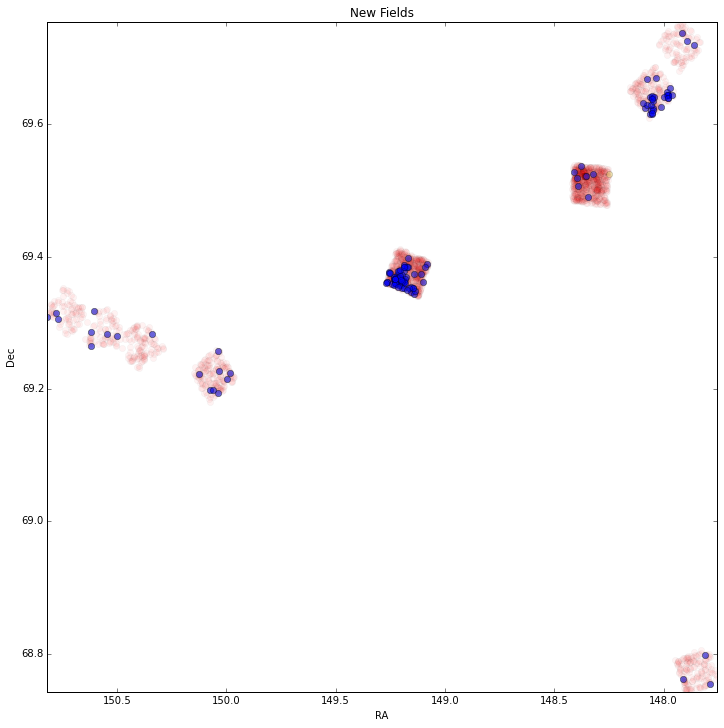

In [16]:
figure(figsize(12,12))

plot(ra_out,dec_out, 'ro', alpha=.05)
plot(ra_out[blueout],dec_out[blueout],'yo',alpha=0.25)
plot(ra_out[bribluout],dec_out[bribluout],'bo',alpha=0.55)
axis([max(ra_out),min(ra_out),min(dec_out),max(dec_out)])
xlabel('RA')
ylabel('Dec')
plt.title('New Fields')

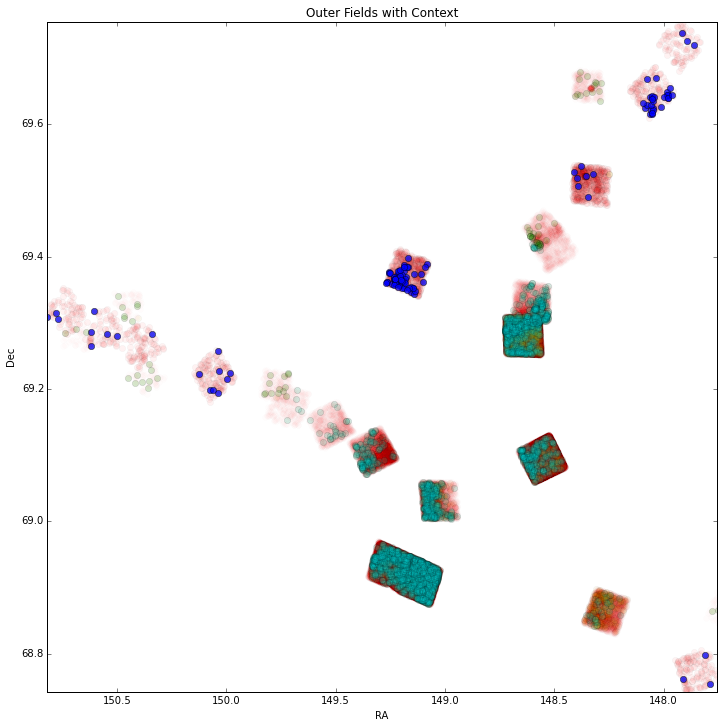

In [17]:
figure(figsize(12,12))

plot(ra_out,dec_out, 'ro', alpha=.05)
plot(ra_out[blueout],dec_out[blueout],'yo',alpha=0.15)
plot(ra_out[bribluout],dec_out[bribluout],'bo',alpha=0.75)

plot(ra_in,dec_in, 'ro', alpha=.01)
plot(ra_in[bluein],dec_in[bluein],'yo',alpha=0.05)
plot(ra_in[bribluin],dec_in[bribluin],'co',alpha=0.15)

plot(ra_wfc3,dec_wfc3, 'ro', alpha=.01)
plot(ra_wfc3[bluewfc3],dec_wfc3[bluewfc3],'yo',alpha=0.05)
plot(ra_wfc3[bribluwfc3],dec_wfc3[bribluwfc3],'go',alpha=0.15)

axis([max(ra_out),min(ra_out),min(dec_out),max(dec_out)])
xlabel('RA')
ylabel('Dec')
plt.title('Outer Fields with Context')

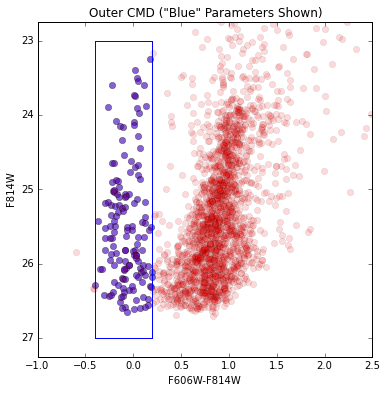

In [18]:
#figure(figsize(12,6))

#plt.subplot(1,2,1)
#plot(f606_out-f814_out,f814_out, 'ko', alpha=0.25)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
#axis([-1,2.5,27,23])  # this sets up the axes, and the next one the labels
#xlabel('F606W-F814W')
#ylabel('F814W')
#plt.title('Outer CMD (all)')

#plt.subplot(1,2,2)

figure(figsize(6,6))

plot((f606_out-f814_out)[bribluout],f814_out[bribluout], 'bo', alpha=0.55)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
plot((f606_out-f814_out),f814_out, 'ro', alpha=0.15)
x1 = -0.4
x2 = 0.2
y1 = 27
y2 = 23
plot((x1,x2),(y1,y1),'b-')
plot((x1,x2),(y2,y2),'b-')
plot((x1,x1),(y1,y2),'b-')
plot((x2,x2),(y1,y2),'b-')
axis([-1,2.5,27.25,22.75])  # this sets up the axes, and the next one the labels
xlabel('F606W-F814W')
ylabel('F814W')
plt.title('Outer CMD ("Blue" Parameters Shown)')

plt.savefig('Outer_CMD_blue_parameters_shown.png', dpi= 500, facecolor='w', bbox_inches= "tight", format='png', transparent=True)

In [31]:
size( f814_out[bribluout] )
size( (f606_out-f814_out)[bribluout] )

print f814_out[bribluout]

2176

In [58]:
ra_outblue = hstack([ra_out[bribluout]])
dec_outblue = hstack([dec_out[bribluout]])

scoords_outblue = SkyCoord(ra_outblue,
                   dec_outblue,
                   unit=(u.deg, u.deg), frame='icrs')

ra_inblue = hstack([ra_in[bribluin]])
dec_inblue = hstack([dec_in[bribluin]])

scoords_inblue = SkyCoord(ra_inblue,
                   dec_inblue,
                   unit=(u.deg, u.deg), frame='icrs')

INFO:astropy:Setting slices=[0]


INFO: Setting slices=[0] [aplpy.core]
INFO

INFO:astropy:Auto-setting vmin to -3.178e+02
INFO:astropy:Auto-setting vmax to  3.494e+03


: Auto-setting vmin to -3.178e+02 [aplpy.core]
INFO: Auto-setting vmax to  3.494e+03 [aplpy.core]


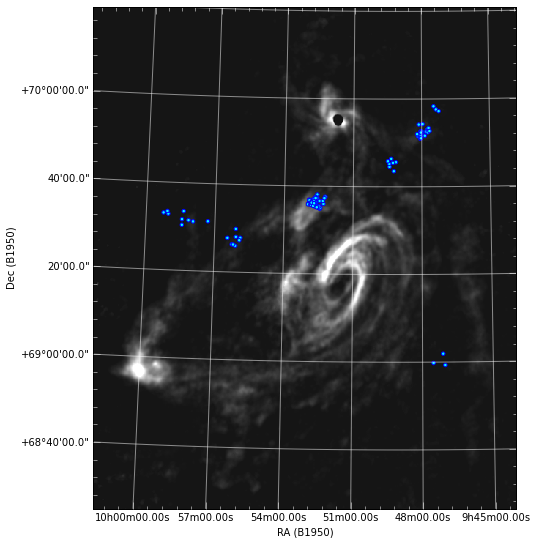

In [99]:
sc1950_out = scoords_outblue.transform_to(FK4)
fig_out = aplpy.FITSFigure('M81HIM0.FITS')
fig_out.show_grayscale()
#fig_out.set_theme('pretty')
fig_out.show_circles(sc1950_out.ra.deg,sc1950_out.dec.deg,1./150.,facecolor='cyan',edgecolor='blue')
fig_out.add_grid()
filename = "HI_FITS_Map_and_Stars.png"
fig_out.save(filename, dpi=500, transparent=True, adjust_bbox=True, format='png')

#sc1950_in = scoords_inblue.transform_to(FK4)
#fig_in = aplpy.FITSFigure('M81HIM0.FITS')
#fig_in.show_grayscale()
#fig_in.show_circles(sc1950_in.ra.deg,sc1950_in.dec.deg,10./3600.,facecolor='cyan',edgecolor='cyan')
#fig_in.add_grid()

THIS WAS A MISTAKE THAT I MADE EARLIER IN MY RESEARCH THAT I WANTED TO DOCUMENT. THIS IS NOT ACCURATE IN ANY WAY.

In [48]:
figure(figsize(12,12))
nblue, = where (((-0.4) < (f606_all-f814_all)) & ((f606_all-f814_all) < (0.2)))
nbriblu, = where(((23) < (f814_all[nblue])) & ((f814_all[nblue]) < (27)))
plot(ra_all,dec_all, 'ro', alpha=.01)
plot(ra_all[nblue],dec_all[nblue],'go',alpha=0.05)
plot(ra_all[nbriblu],dec_all[nbriblu],'bo',alpha=0.55)
axis([max(ra_all),min(ra_all),min(dec_all),max(dec_all)])
xlabel('RA')
ylabel('Dec')
plt.title('WRONG All Fields')

Plot colour-mag of outer fields. Some, less dense, etc. $\checkmark$

$\space \space \space \space \space$ Look at those fields' images

$\space \space \space \space \space$ Compare cmag to field 8, something like it [choose 6] $\checkmark$

Do same plots for M83

(clean up the colours in the above plot) $\checkmark$

CMD for MiASs and control $\checkmark$

Field 16 $\checkmark$

Field 12 $\checkmark$